In [4]:
!pip install kagglehub

In [25]:
import kagglehub


path = kagglehub.dataset_download("yasserh/titanic-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Sibam Das\.cache\kagglehub\datasets\yasserh\titanic-dataset\versions\1


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

C:\Users\Sibam Das\AppData\Local\Temp\ipykernel_36368\3416915032.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\Sibam Das\AppData\Local\Temp\ipykernel_36368\3416915032.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

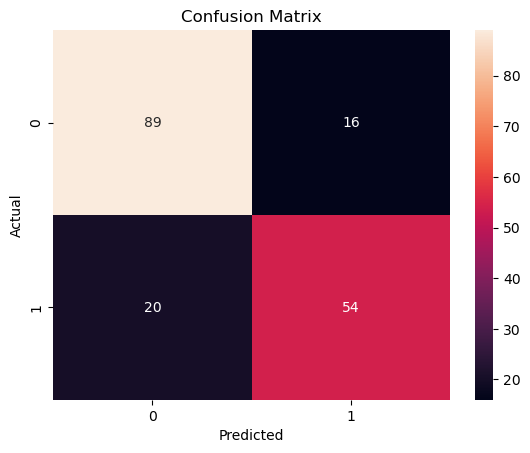

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

df = pd.read_csv("Titanic-Dataset.csv")

print(df.head())
print(df.info())
print(df.isnull().sum())

df = df.drop(['Name', 'Ticket', 'Cabin'], axis=1)
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

sns.heatmap(pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted']), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

df = pd.read_csv("Titanic-Dataset.csv")
df = df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Cabin'] = df['Cabin'].notnull().astype(int)
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

X = df.drop('Survived', axis=1)
y = df['Survived']
model = LogisticRegression(max_iter=500)
model.fit(X, y)

pclass = int(input("Enter Passenger Class (1, 2, or 3): "))
fare = float(input("Enter Fare: "))
cabin = input("Was Cabin number assigned? (yes/no): ").strip().lower()
cabin_assigned = 1 if cabin == 'yes' else 0
age = float(input("Enter Age: "))
sibsp = int(input("Enter number of siblings/spouses aboard: "))
parch = int(input("Enter number of parents/children aboard: "))
sex = input("Enter sex (male/female): ").strip().lower()
sex_male = 1 if sex == 'male' else 0
embarked = input("Enter Port of Embarkation (Q or S): ").strip().upper()
embarked_Q = 1 if embarked == 'Q' else 0
embarked_S = 1 if embarked == 'S' else 0

input_data = [[
    pclass, age, sibsp, parch, fare, cabin_assigned,
    sex_male, embarked_Q, embarked_S
]]

input_df = pd.DataFrame(input_data, columns=X.columns)
prediction = model.predict(input_df)

print("\nPrediction:", "Survived 🟢" if prediction[0] == 1 else "Did not survive 🔴")


Enter Passenger Class (1, 2, or 3):  13
Enter Fare:  45
Was Cabin number assigned? (yes/no):  no
Enter Age:  34
Enter number of siblings/spouses aboard:  2
Enter number of parents/children aboard:  1
Enter sex (male/female):  male
Enter Port of Embarkation (Q or S):  Q



Prediction: Did not survive 🔴
